# Building logistic regression model, K-NN model and SVM model to predict 
## whether an employee is likely to leave his/her job.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
HR_data=pd.read_csv('/content/hr_dataset.csv')

## Exploratory Data Analysis

In [ ]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
HR_data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
HR_data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
HR_data.shape

(14999, 10)

## Checking Null Values

In [ ]:
HR_data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

# **Inference:**
There is no missing value for any of the features.

## Checking for Outliers

In [ ]:
HR_data.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

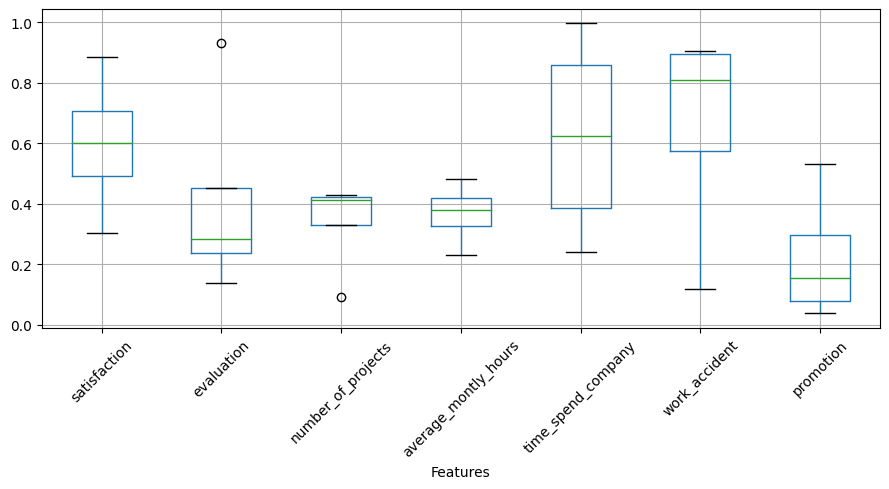

In [ ]:
cols=['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion']
df = pd.DataFrame(data = np.random.random(size=(4,7)), columns = cols)
plt.xlabel('Features')
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

## The feature 'number_of_projects' and 'evaluation' have outliers.

In [ ]:
Q1 = np.percentile(HR_data['number_of_projects'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(HR_data['number_of_projects'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(HR_data['number_of_projects']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(HR_data['number_of_projects']<=lower)
# Removing the outliers
if np.count_nonzero(upper_array):
  HR_data.drop(upper_array[0],inplace=True)
if np.count_nonzero(lower_array):
  HR_data.drop(lower_array[0],inplace=True)


Q1 = np.percentile(HR_data['evaluation'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(HR_data['evaluation'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(HR_data['evaluation']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(HR_data['evaluation']<=lower)
# Removing the outliers
if np.count_nonzero(upper_array):
  HR_data.drop(upper_array[0],inplace=True)
if np.count_nonzero(lower_array):
  HR_data.drop(lower_array[0],inplace=True)


In [ ]:
HR_data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
HR_data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

## One Hot Encoding for the feature 'department'

In [ ]:
HR_data=pd.get_dummies(data=HR_data, columns=['department'])

In [ ]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   evaluation              14999 non-null  float64
 2   number_of_projects      14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   churn                   14999 non-null  int64  
 7   promotion               14999 non-null  int64  
 8   salary                  14999 non-null  object 
 9   department_IT           14999 non-null  uint8  
 10  department_RandD        14999 non-null  uint8  
 11  department_accounting   14999 non-null  uint8  
 12  department_hr           14999 non-null  uint8  
 13  department_management   14999 non-null  uint8  
 14  department_marketing    14999 non-null

In [ ]:
HR_data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


## Splitting the dataset into Dependent(Y) and Independent(X) features

In [ ]:
Y=HR_data['churn']
X=HR_data.drop(['churn'], axis=1)

## Label Encoding for the feature 'salary'

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
LE.fit(HR_data['salary'])

LabelEncoder()

In [ ]:
LE.classes = np.array(["low","medium","high"])

In [ ]:
X.loc[:,"salary"] = LE.transform(X['salary'])

In [ ]:
X.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


## Using Standard Scaler

In [ ]:
Scale=StandardScaler()
ScaledX=Scale.fit_transform(X)

## Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ScaledX,Y, test_size=0.2,random_state=32 )

In [ ]:
def models(model):
  fit=model.fit(x_train,y_train.values.ravel())
  y_pred=fit.predict(x_test)
  print(" Accuracy is ")
  print(round(accuracy_score(y_pred, y_test),2))
  print()
  print("Classification Report")
  print(classification_report(y_test,y_pred))
  print("Confusion Matrix")
  print(confusion_matrix(y_test,y_pred))

  

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
models(LR)

 Accuracy is 
0.77

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2318
           1       0.50      0.28      0.36       682

    accuracy                           0.77      3000
   macro avg       0.65      0.60      0.61      3000
weighted avg       0.74      0.77      0.75      3000

Confusion Matrix
[[2124  194]
 [ 490  192]]


## Inference: 
Logistic Regression can predict whether an employee will leave the company or not with 77 % accuracy.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [ ]:
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=round(accuracy_score(y_test,y_pred),2)
    acc_values.append(acc)
    

In [ ]:
print("Accuracy Values :", acc_values)

Accuracy Values : [0.95, 0.94, 0.94, 0.93, 0.94, 0.94, 0.94, 0.93, 0.94, 0.93, 0.94, 0.93, 0.94]


In [ ]:
y_pred = KNN.predict(x_test)

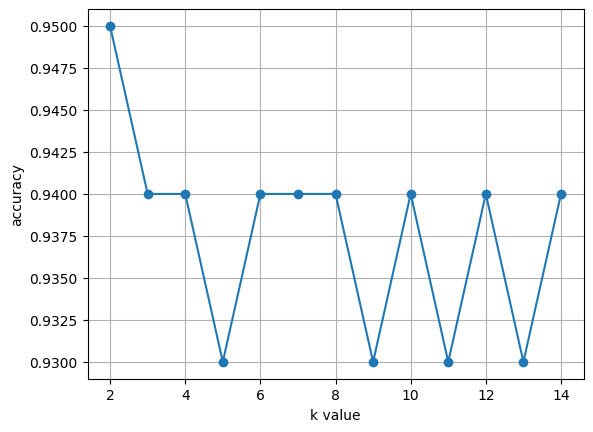

In [ ]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2318
           1       0.80      0.94      0.86       682

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.91      3000
weighted avg       0.94      0.93      0.93      3000



In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[2159  159]
 [  44  638]]


In [ ]:
KNN= KNeighborsClassifier(leaf_size=1, n_neighbors=2 , p=1)
models(KNN)

 Accuracy is 
0.96

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2318
           1       0.90      0.92      0.91       682

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix
[[2248   70]
 [  56  626]]


# Inference: 
KNN can predict whether an employee will leave the company or not with 96 % accuracy.

## **SVM**

---



In [ ]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
models(svm_linear)

 Accuracy is 
0.78

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2318
           1       0.54      0.28      0.37       682

    accuracy                           0.78      3000
   macro avg       0.68      0.61      0.62      3000
weighted avg       0.75      0.78      0.75      3000

Confusion Matrix
[[2156  162]
 [ 491  191]]


## Inference: 
SVM can predict whether an employee will leave the company or not with 78 % accuracy.

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
models(DT)

 Accuracy is 
0.98

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2318
           1       0.94      0.97      0.96       682

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix
[[2276   42]
 [  18  664]]


## Inference: 
Decision Tree Classifier can predict whether an employee will leave the company or not with 98 % accuracy.

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier(estimator = DT, n_estimators= 50)
models(BC)

 Accuracy is 
0.99

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2318
           1       0.99      0.98      0.98       682

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix
[[2311    7]
 [  17  665]]


## Inference: 
Bagging Classifier can predict whether an employee will leave the company or not with 99 % accuracy.

## Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
cross_results = cross_val_score(BC, X, Y, cv = 5)

In [ ]:
print("Cross validation results:",cross_results)
print()
print("Average Cross Validation Score",round(cross_results.mean(),2))

Cross validation results: [0.99666667 0.97633333 0.98166667 0.99766667 0.99199733]

Average Cross Validation Score 0.99


## Inference: 
Cross Validation can predict whether an employee will leave the company or not with 99 % accuracy.

## Conclusion:
As per the information provided to us, Cross Validation with Bagging Classifier as the estimator can predict whether an employee will leave the company or not with 99% accuracy.